# Scaler Data Analysis

# Approach
- Basic Data Analysis
- Data Preprocessing
    - Data Cleaning
    - Data Transformation
    - Handling missing values
- Exploratory Data Analysis
    - Univariate, Bivariate, Multivariate Analysis
    - Target vs Features
- Statistical Tests
    - Chisquare, Anova Test
- Modeling
- Assumptions of Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
np.set_printoptions(suppress=True)
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, OrdinalEncoder
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, precision_recall_curve, auc

bold_start = '\033[1m'
bold_end = '\033[0m'

In [2]:
raw_data = pd.read_csv(r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Scaler\Dataset\scaler_clustering.csv")
# raw_data = pd.read_csv(r"E:\Nextstep\Scaler\Business-Case-Study\Scaler\Dataset\scaler_clustering.csv")
raw_data.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


# Data Analysis

In [4]:
print("Number of rows in the dataset: ", len(raw_data))
raw_data.info()

Number of rows in the dataset:  205843
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [5]:
raw_data.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [6]:
raw_data.describe(include='object')

,company_hash,email_hash,job_position
count,205799,205843,153281
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


## Unique Values

In [7]:
raw_data.nunique()

Unnamed: 0          205843
company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1017
ctc_updated_year         7
dtype: int64

#### Inference:
- Unnamed0 is a column with unique values, it seems to be serial number and hence not useful for analysis
- CTC
    - Min value indicates 2, might be a mistake need further analysis
    - Mean and Median salary are 22 LPA, 9.5 LPA
- orgyear and ctc_updated_year are year column
- Min orgyear of value 0 indicates the problem with the column
- Personal details are given as hash values
- The dataset contains 153443 personnel from 37299 companies
- 1017 unique job positions are present in the dataset with "Backend Engineer" being predominant 

## Null Values

In [8]:
print(bold_start + "Percentage of Null values by columns" + bold_end)
(raw_data.isnull().sum()/len(raw_data))*100

Percentage of Null values by columns


Unnamed: 0           0.000000
company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.534995
ctc_updated_year     0.000000
dtype: float64

#### Inference:
- 25% of job position in the dataset are missing, requires significant imputation
- company_hash and orgyear has very small number of missing values 

# Data Preprocessing

## Data Cleaning

In [3]:
intermediate_df = raw_data.copy()
intermediate_df['dups'] = 0
unique_ind = list(raw_data.dropna(axis=1).drop("Unnamed: 0", axis=1).drop_duplicates().index)
intermediate_df.loc[unique_ind, "dups"] = 1
intermediate_df.loc[intermediate_df.dropna().index, "dups"] = 0
intermediate_df = intermediate_df[intermediate_df["dups"]!=1]

In [4]:
# Drop Duplicates

df = intermediate_df.copy()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,dups
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,0


In [135]:
len(df)

169063

## Email HASH

In [5]:
oe = OrdinalEncoder()
df['email_encoded'] = oe.fit_transform(np.array(df['email_hash']).reshape(-1,1))
df['email_encoded'].nunique()

133388

### OrgYear

In [137]:
a = df['orgyear'].value_counts().reset_index()
[print(a.iloc[i, :]['index'], ":", a.iloc[i, :]['orgyear']) for i in range(len(a))] # Inconsistency detected

2018.0 : 21202.0
2017.0 : 19812.0
2016.0 : 19533.0
2015.0 : 17632.0
2019.0 : 16270.0
2014.0 : 14452.0
2013.0 : 10671.0
2012.0 : 9206.0
2020.0 : 8336.0
2011.0 : 6917.0
2010.0 : 5044.0
2009.0 : 3302.0
2021.0 : 2683.0
2008.0 : 2373.0
2007.0 : 1974.0
2006.0 : 1824.0
2005.0 : 1646.0
2004.0 : 1311.0
2003.0 : 918.0
2022.0 : 646.0
2001.0 : 641.0
2002.0 : 619.0
2000.0 : 452.0
1999.0 : 304.0
1998.0 : 259.0
1997.0 : 215.0
2023.0 : 188.0
1996.0 : 124.0
1995.0 : 85.0
1991.0 : 69.0
1993.0 : 67.0
1994.0 : 58.0
1992.0 : 40.0
2024.0 : 35.0
1990.0 : 32.0
1989.0 : 21.0
2025.0 : 11.0
1988.0 : 10.0
2026.0 : 7.0
1986.0 : 6.0
1987.0 : 6.0
3.0 : 6.0
2029.0 : 5.0
0.0 : 5.0
1985.0 : 4.0
2028.0 : 4.0
2031.0 : 4.0
1984.0 : 3.0
1982.0 : 3.0
5.0 : 2.0
2.0 : 2.0
91.0 : 2.0
6.0 : 2.0
1.0 : 2.0
1970.0 : 1.0
2204.0 : 1.0
38.0 : 1.0
1979.0 : 1.0
1900.0 : 1.0
201.0 : 1.0
1977.0 : 1.0
83.0 : 1.0
1971.0 : 1.0
4.0 : 1.0
1976.0 : 1.0
2027.0 : 1.0
1973.0 : 1.0
1981.0 : 1.0
1972.0 : 1.0
200.0 : 1.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### Inference:
- Mistakes identified in the org year column, as it corresponds to organisation year
- Out of range values such as 0, 3, 91, 2, 20165, 6,5,1, 83, 209, 2204, 1900, 201, 38, 4, 206, 2106, 2107, 2101, 208, 200
- Fill values with mode

In [6]:
df.loc[(df['orgyear'] < 1970) | (df['orgyear'] > 2025), 'orgyear'] = df['orgyear'].mode()[0]

### Distribution plot for Org Year

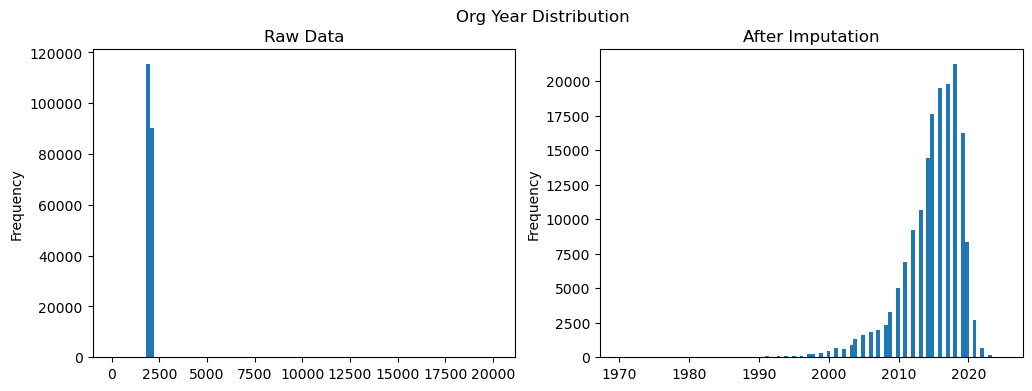

In [139]:
plt.figure(figsize=(12,4))
plt.suptitle('Org Year Distribution')
plt.subplot(1,2,1)
raw_data['orgyear'].plot(kind='hist', bins=100)
plt.title('Raw Data')
plt.subplot(1,2,2)
df['orgyear'].plot(kind='hist', bins=100)
plt.title('After Imputation')
plt.show()

In [7]:
# Handle Missing Values
df['orgyear'] = pd.to_datetime(df['orgyear'].fillna(df['orgyear'].mode()[0]), format="%Y").dt.year
print("Null Values in OrgYear: ", df['orgyear'].isnull().sum())

Null Values in OrgYear:  0


### CTC

In [ ]:
# No Null values
# Outliers detected will be addressed later

## Job Position

In [15]:
sorted(df['job_position'].dropna().unique())

[' SDE 2',
 '.',
 '..',
 '.7',
 '7',
 '7033771951',
 '737',
 '857628',
 '896651',
 '91',
 'A Group Chat Application',
 'ABAP Developer',
 'ASE',
 'ASSISTANT ENGINEER TRAINEE',
 'ASSISTANT PROFESSOR ',
 'ASSISTANT SYSTEM ENGINEER',
 'ATM Interface System',
 'Account',
 'Administrative clerk',
 'Administrator',
 'Advisor',
 'Advisory Consultant - UI/UX Expert',
 'Advisory Software Engineer',
 'Advisory System Analyat',
 'Agency collection manager',
 'Ai engineer',
 'Analyst / Software Engineer',
 'Analyst consultant',
 'Analyst programmer',
 'Analytics and Insite Devloper',
 'Android Application Developer',
 'Android Application developer',
 'Android Developer Sr Executive',
 'Android Engineer',
 'Android Facilitator',
 'Android Lead',
 'Any technical',
 'App Developer',
 'Application Developer (Frontend)',
 'Application Developer 1',
 'Application Developer 2',
 'Application Developer Analyst',
 'Application Development Analyst',
 'Application Development Associate',
 'Application Devel

#### Inference:
- Invalid occupations are observed
- Case sensitive differences
- Replace special characters with space
- Trim the text and remove double spaces
- Remove only numbers
- create categories for occupation
- Software Categories: Software, application, system, systems, IT, tech, technology, frontend, front end, backend, full stack, fullstack, cloud, computer, database, devops, firmware, app, programmer, java, developer, UI, sde, sw, se, web
- Data categories: data, analyst, analytics, business, etl, ML, machine learning, ai
- Not employed: 'no', 'none', 'not', 'null'
- other to others
- Search for non dictionary words

In [8]:
sw_cat = ['software', 'application', 'applications', 'system', 'systems', 'IT', 'tech', 'technical', 'technology', 'frontend', 'end', 'backend', 'stack', 'fullstack', 'cloud', 'computer', 'database', 'devops', 'firmware', 'app', 'programmer', 'java', 'developer', 'development', 'ui', 'sde', 'sw', 'se', 'web']
data_cat = ['data', 'analyst', 'analytics', 'business', 'etl', 'ml', 'machine', 'learning', 'ai']

In [9]:
def text_clean(text):    
    if type(text) == str:
        text = text.lower().strip()
        text = re.sub('[^A-Za-z0-9 ]+', ' ', text)
        text = text.replace("  ", " ").strip()
        text = re.sub(r'^\d+$', 'others', text)
        if text == '':
            text = 'others'
        words = text.split()
        for word in words:
            if word in ['no', 'none', 'not', 'null', 'some']:
                return "Un Employed"
    return text

In [10]:
def assign_software(text):
    if type(text) == str:
        for word in text.split():
            if word in sw_cat:
                return 1
    return 0

In [11]:
def assign_data(text):
    if type(text) == str:
        for word in text.split():
            if word in data_cat:
                return 1
    return 0

In [12]:
df['job_cleaned'] = df['job_position'].apply(text_clean)
df['software_job'] = df['job_cleaned'].apply(assign_software)
df['data_job'] = df['job_cleaned'].apply(assign_data)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,dups,email_encoded,job_cleaned,software_job,data_job
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020.0,0,57308.0,other,0,0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019.0,0,92119.0,fullstack engineer,1,0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020.0,0,37747.0,backend engineer,1,0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019.0,0,125068.0,backend engineer,1,0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019.0,0,58366.0,fullstack engineer,1,0


In [142]:
print("Unique job positions before cleaning: ", df['job_position'].nunique())
print("Unique job positions after cleaning: ", df['job_cleaned'].nunique())

Unique job positions before cleaning:  1017
Unique job positions after cleaning:  878


In [13]:
def Encode_cat(data):
    oe = OrdinalEncoder()
    data_arr = np.array(data.dropna()).reshape(-1,1)
    data_enc = oe.fit_transform(data_arr)
    data.loc[data.notnull()] = np.squeeze(data_enc)
    return data

In [14]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,dups,email_encoded,job_cleaned,software_job,data_job
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020.0,0,57308.0,other,0,0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019.0,0,92119.0,fullstack engineer,1,0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020.0,0,37747.0,backend engineer,1,0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019.0,0,125068.0,backend engineer,1,0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019.0,0,58366.0,fullstack engineer,1,0


In [15]:
df['job_encoded'] = Encode_cat(df['job_cleaned'].copy())
df['company_encoded'] = Encode_cat(df['company_hash'])
df.isnull().sum()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1384\3507244384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.notnull()] = np.squeeze(data_enc)


company_hash            6
email_hash              0
orgyear                 0
ctc                     0
job_position        15853
ctc_updated_year        0
dups                    0
email_encoded           0
job_cleaned         15853
software_job            0
data_job                0
job_encoded         15853
company_encoded         6
dtype: int64

In [16]:
transformed_df = df.drop(['company_hash','email_hash', 'job_position', 'job_cleaned'], axis=1)

In [17]:
imputer = KNNImputer(n_neighbors=2)
impute_res = imputer.fit_transform(transformed_df.drop("job_encoded", axis=1))

In [18]:
transformed_df['company_encoded'] = impute_res[:,-1]
transformed_df.isnull().sum()

orgyear                 0
ctc                     0
ctc_updated_year        0
dups                    0
email_encoded           0
software_job            0
data_job                0
job_encoded         15853
company_encoded         0
dtype: int64

In [19]:
df['company_encoded'] = impute_res[:,-1]

### CTC Updated Year

In [149]:
df.isnull().sum()

company_hash            6
email_hash              0
orgyear                 0
ctc                     0
job_position        15853
ctc_updated_year        0
dups                    0
email_encoded           0
job_cleaned         15853
software_job            0
data_job                0
job_encoded         15853
company_encoded         0
dtype: int64

In [20]:
# df['ctc_updated_year'] = 
df['ctc_updated_year'] = pd.to_datetime(df['ctc_updated_year'], format="%Y").dt.year

In [21]:
df.to_csv("df.csv", index=False)

# Exploratory Data Analysis
- Univariate Analysis
    - Categorical: *Frequency and Proportion Plots*
    - Numerical: *Distribution and Box plots*
    - *Skewness and Kurtosis*
- Bivariate Analysis
- Multivariate Analysis

In [22]:
cat_features = list(transformed_df.columns)
cat_features.remove('ctc')
num_features = ['ctc']

In [23]:
print(cat_features)

['orgyear', 'ctc_updated_year', 'email_encoded', 'software_job', 'data_job', 'job_encoded', 'company_encoded']


In [49]:
def univariate_plot(df, feature):
    plt.figure(figsize=(12,4))
    plt.suptitle('Univariate Analysis of ' + feature)
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=feature, bins=100, kde=True) 
    plt.title("Distribution Plot")
    if feature in cat_features:
        if df[feature].nunique() <= 10:            
            plt.subplot(1,2,2)
            labels = df[feature].value_counts().index
            plt.pie(x=list(df[feature].value_counts()), labels=list(labels), autopct="%0.2f") 
            plt.title("Proportion Plot")
            plt.show()
        else:
            # Top 10 categories
            temp = df[feature].value_counts()[:10]            
            # plt.bar(height=temp, x=list(temp.index))
            plt.subplot(1,2,2)
            sns.barplot(x=list(temp.index), y=temp)
            plt.title("Top 10 categories")
    else:
        plt.subplot(1,2,2)        
        plt.boxplot(df[feature])        
        plt.show()

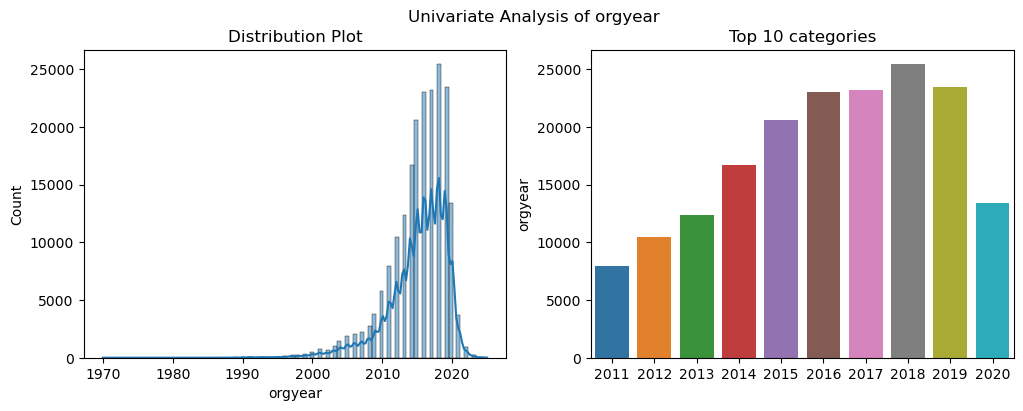

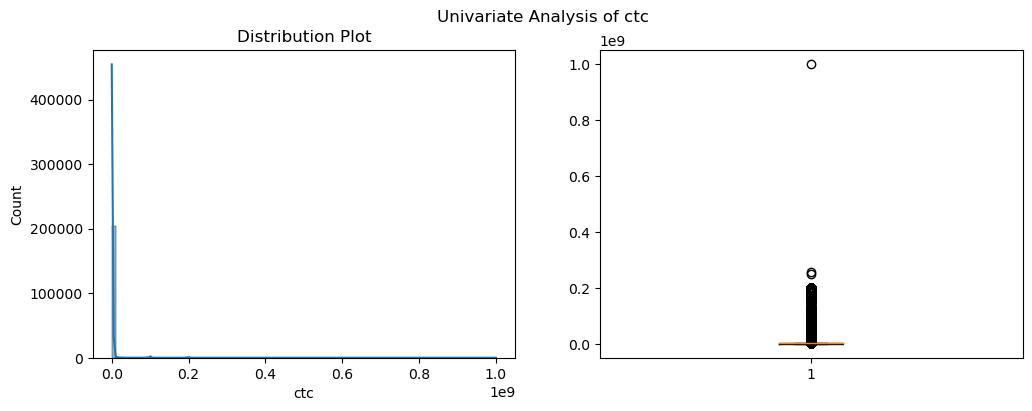

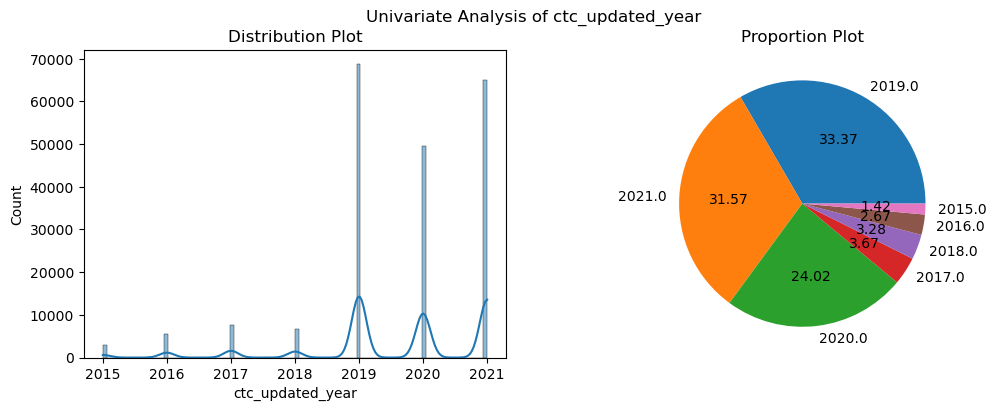

In [ ]:
for feature in list(transformed_df.columns):
    univariate_plot(transformed_df, feature)

In [32]:
def cat_col(x):
    soft = x['software_job']
    data = x['data_job']
    
    if soft == 1 and data == 1:
        return 'Both'
    elif data == 1:
        return 'data'
    elif soft == 1:
        return 'software'
    else:
        return 'Other'

In [ ]:
transformed_df['job_type'] = transformed_df[['software_job', 'data_job']].apply(cat_col, axis=1)
plt.pie(transformed_df['job_type'].value_counts(), labels=list(transformed_df['job_type'].value_counts().index), autopct="%2d%%")
plt.title("Distribution of Job Type")
plt.show()

#### Inference:
- 
- ~42% and ~4% are from software domain and data domain

## Bivariate Analysis

# Manual Clustering

## Cluster 1: Company, Job, Years of Experience

In [126]:
cluster_df1 = df[['email_encoded','company_encoded', 'job_cleaned', 'orgyear', 'ctc']].copy()
cluster_df1.head()

,email_encoded,company_encoded,job_cleaned,orgyear,ctc
0,57308.0,871.0,other,2016,1100000
1,92119.0,18125.0,fullstack engineer,2018,449999
2,37747.0,14246.0,backend engineer,2015,2000000
3,125068.0,11088.0,backend engineer,2017,700000
4,58366.0,18591.0,fullstack engineer,2017,1400000


In [127]:
cluster_df1.reset_index(drop=True, inplace=True)

In [128]:
cluster_df1['job_cleaned'] = cluster_df1['job_cleaned'].fillna("Unknown")
cluster_df1.isnull().sum()

email_encoded      0
company_encoded    0
job_cleaned        0
orgyear            0
ctc                0
dtype: int64

In [129]:
cluster_df1['yoe'] = 2025 - cluster_df1['orgyear']
cluster_df1.head()

,email_encoded,company_encoded,job_cleaned,orgyear,ctc,yoe
0,57308.0,871.0,other,2016,1100000,9
1,92119.0,18125.0,fullstack engineer,2018,449999,7
2,37747.0,14246.0,backend engineer,2015,2000000,10
3,125068.0,11088.0,backend engineer,2017,700000,8
4,58366.0,18591.0,fullstack engineer,2017,1400000,8


In [130]:
cluster_df1_grp = cluster_df1.drop("orgyear", axis=1).groupby(["company_encoded","job_cleaned","yoe"]).agg({"email_encoded": lambda x: list(x), "ctc":{'mean', 'median', 'max', 'min', 'count'}})

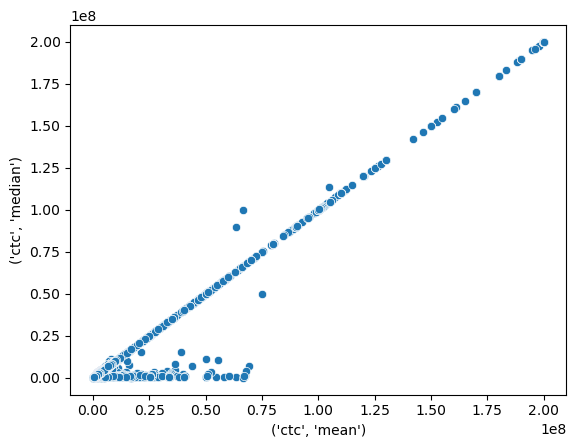

In [131]:
sns.scatterplot(x=cluster_df1_grp.loc[:,('ctc', 'mean')], y=cluster_df1_grp.loc[:,('ctc', 'median')])
plt.show()

#### Inference:
- In handful of clusters, Mean CTC > Median CTC indicating 
- Linear trend indicates Majority of clusters are having mean and median similar, indicating unskewed distribution in salaries or the clusters with single personnel

In [132]:
cluster_df1_grp = cluster_df1_grp.reset_index()
cluster_df1_grp.columns = ['_'.join(col) if col[0] == 'ctc' else col[0] for col in cluster_df1_grp.columns]
cluster_df1_grp.head()

,company_encoded,job_cleaned,yoe,email_encoded,ctc_median,ctc_count,ctc_min,ctc_max,ctc_mean
0,0.0,other,5,[120915.0],100000.0,1,100000,100000,100000.0
1,1.0,other,8,[93822.0],300000.0,1,300000,300000,300000.0
2,2.0,android engineer,9,[67501.0],270000.0,1,270000,270000,270000.0
3,2.0,frontend engineer,14,[117715.0],830000.0,1,830000,830000,830000.0
4,3.0,backend engineer,6,[37025.0],1100000.0,1,1100000,1100000,1100000.0


In [133]:
cluster_df1_grp['Cluster'] = np.arange(1,len(cluster_df1_grp)+1)
cluster_df1_grp = cluster_df1_grp.explode("email_encoded").reset_index(drop=True)
cluster_df1_grp['Cluster'].value_counts()

36402     291
36584     279
14934     270
36403     265
36341     247
         ... 
37033       1
37030       1
37029       1
37028       1
100365      1
Name: Cluster, Length: 100365, dtype: int64

In [136]:
cluster_df1_grp['ctc'] = cluster_df1['ctc']
cluster_df1_grp.head()

,company_encoded,job_cleaned,yoe,email_encoded,ctc_median,ctc_count,ctc_min,ctc_max,ctc_mean,Cluster,ctc
0,0.0,other,5,120915.0,100000.0,1,100000,100000,100000.0,1,1100000
1,1.0,other,8,93822.0,300000.0,1,300000,300000,300000.0,2,449999
2,2.0,android engineer,9,67501.0,270000.0,1,270000,270000,270000.0,3,2000000
3,2.0,frontend engineer,14,117715.0,830000.0,1,830000,830000,830000.0,4,700000
4,3.0,backend engineer,6,37025.0,1100000.0,1,1100000,1100000,1100000.0,5,1400000


#### Inference:
- Total of 100365 clusters identified
- Cluster IDs 36402, 36584, 14934 contains top3 quantity of employees  

In [165]:
def salary_level(x):
    offset = 0.10 * x['ctc']
    if x['ctc'] >= (x['ctc_mean'] + offset):
        return "High"
    elif x['ctc'] <= (x['ctc_mean'] - offset):
        return "Low"
    else:
        return "Avg"

In [166]:
cluster_df1_grp['designation'] = cluster_df1_grp[['ctc', 'ctc_mean']].apply(salary_level, axis=1)
cluster_df1_grp['designation'].value_counts()

Low     86066
High    71799
Avg     11198
Name: designation, dtype: int64

## Cluster 2: Company, Job

In [94]:
cluster_df1.head()

,email_encoded,company_encoded,job_cleaned,orgyear,ctc,yoe
0,57308.0,871.0,other,2016,1100000,9
1,92119.0,18125.0,fullstack engineer,2018,449999,7
2,37747.0,14246.0,backend engineer,2015,2000000,10
3,125068.0,11088.0,backend engineer,2017,700000,8
4,58366.0,18591.0,fullstack engineer,2017,1400000,8


In [137]:
cluster_df2_grp = cluster_df1.drop("orgyear", axis=1).groupby(["company_encoded","job_cleaned"]).agg({"email_encoded": lambda x: list(x), "ctc":{'mean', 'median', 'max', 'min', 'count'}})

In [140]:
cluster_df2_grp

email_encoded        ctc                 \
                                        <lambda>     median count      min   
company_encoded job_cleaned                                                  
0.0             other                 [120915.0]   100000.0     1   100000   
1.0             other                  [93822.0]   300000.0     1   300000   
2.0             android engineer       [67501.0]   270000.0     1   270000   
                frontend engineer     [117715.0]   830000.0     1   830000   
3.0             backend engineer       [37025.0]  1100000.0     1  1100000   
...                                          ...        ...   ...      ...   
34257.0         frontend engineer      [38461.0]   940000.0     1   940000   
34258.0         other                  [65250.0]  1370000.0     1  1370000   
34259.0         Unknown               [105546.0]   600000.0     1   600000   
                fullstack engineer    [105546.0]   600000.0     1   600000   
34260.0         other                  [32124.0]   720000.0     1   720000   

                                                        
                                        max       mean  
company_encoded job_cleaned                             
0.0             other                100000   100000.0  
1.0             other                300000   300000.0  
2.0             android engineer     270000   270000.0  
                frontend engineer    830000   830000.0  
3.0             backend engineer    1100000  1100000.0  
...                                     ...        ...  
34257.0         frontend engineer    940000   940000.0  
34258.0         other               1370000  1370000.0  
34259.0         Unknown              600000   600000.0  
                fullstack engineer   600000   600000.0  
34260.0         other                720000   720000.0  

[63957 rows x 6 columns]

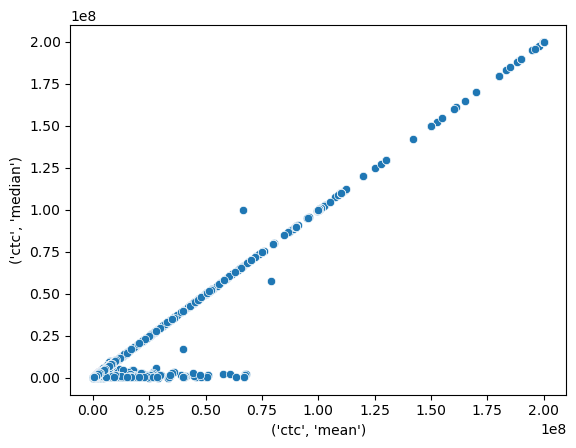

In [138]:
sns.scatterplot(x=cluster_df2_grp.loc[:,('ctc', 'mean')], y=cluster_df2_grp.loc[:,('ctc', 'median')])
plt.show()

#### Inference:
- In handful of clusters, Mean CTC > Median CTC indicating 
- Linear trend indicates Majority of clusters are having mean and median similar, indicating unskewed distribution in salaries

In [141]:
cluster_df2_grp = cluster_df2_grp.reset_index()
cluster_df2_grp.columns = ['_'.join(col) if col[0] == 'ctc' else col[0] for col in cluster_df2_grp.columns]
cluster_df2_grp.head()

,company_encoded,job_cleaned,email_encoded,ctc_median,ctc_count,ctc_min,ctc_max,ctc_mean
0,0.0,other,[120915.0],100000.0,1,100000,100000,100000.0
1,1.0,other,[93822.0],300000.0,1,300000,300000,300000.0
2,2.0,android engineer,[67501.0],270000.0,1,270000,270000,270000.0
3,2.0,frontend engineer,[117715.0],830000.0,1,830000,830000,830000.0
4,3.0,backend engineer,[37025.0],1100000.0,1,1100000,1100000,1100000.0


In [143]:
cluster_df2_grp['Cluster'] = np.arange(1,len(cluster_df2_grp)+1)
cluster_df2_grp = cluster_df2_grp.explode("email_encoded").reset_index(drop=True)
cluster_df2_grp['Cluster'].value_counts()

23111    1354
45010    1159
23138    1058
23096     939
12963     903
         ... 
24285       1
24286       1
24287       1
24288       1
63957       1
Name: Cluster, Length: 63957, dtype: int64

#### Inference:
- Total of 63957 clusters identified
- Cluster IDs 23111, 45010, 23138 contains top3 quantity of employees  

In [144]:
cluster_df2_grp['ctc'] = cluster_df1['ctc']
cluster_df2_grp.head()

,company_encoded,job_cleaned,email_encoded,ctc_median,ctc_count,ctc_min,ctc_max,ctc_mean,Cluster,ctc
0,0.0,other,120915.0,100000.0,1,100000,100000,100000.0,1,1100000
1,1.0,other,93822.0,300000.0,1,300000,300000,300000.0,2,449999
2,2.0,android engineer,67501.0,270000.0,1,270000,270000,270000.0,3,2000000
3,2.0,frontend engineer,117715.0,830000.0,1,830000,830000,830000.0,4,700000
4,3.0,backend engineer,37025.0,1100000.0,1,1100000,1100000,1100000.0,5,1400000


In [168]:
cluster_df2_grp['class'] = cluster_df2_grp[['ctc', 'ctc_mean']].apply(salary_level, axis=1)
cluster_df2_grp['class'].value_counts()

Low     96373
High    61135
Avg     11555
Name: class, dtype: int64

## Cluster 3: Company

In [145]:
cluster_df3_grp = cluster_df1.drop("orgyear", axis=1).groupby(["company_encoded"]).agg({"email_encoded": lambda x: list(x), "ctc":{'mean', 'median', 'max', 'min', 'count'}})

In [146]:
cluster_df3_grp

email_encoded        ctc                          \
                             <lambda>     median count      min      max   
company_encoded                                                            
0.0                        [120915.0]   100000.0     1   100000   100000   
1.0                         [93822.0]   300000.0     1   300000   300000   
2.0               [117715.0, 67501.0]   550000.0     2   270000   830000   
3.0                         [37025.0]  1100000.0     1  1100000  1100000   
4.0                         [83853.0]   250000.0     1   250000   250000   
...                               ...        ...   ...      ...      ...   
34256.0                     [30719.0]  2400000.0     1  2400000  2400000   
34257.0                     [38461.0]   940000.0     1   940000   940000   
34258.0                     [65250.0]  1370000.0     1  1370000  1370000   
34259.0          [105546.0, 105546.0]   600000.0     2   600000   600000   
34260.0                     [32124.0]   720000.0     1   720000   720000   

                            
                      mean  
company_encoded             
0.0               100000.0  
1.0               300000.0  
2.0               550000.0  
3.0              1100000.0  
4.0               250000.0  
...                    ...  
34256.0          2400000.0  
34257.0           940000.0  
34258.0          1370000.0  
34259.0           600000.0  
34260.0           720000.0  

[34264 rows x 6 columns]

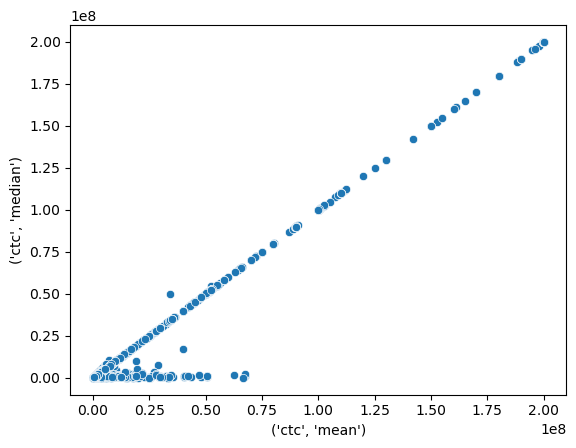

In [147]:
sns.scatterplot(x=cluster_df3_grp.loc[:,('ctc', 'mean')], y=cluster_df3_grp.loc[:,('ctc', 'median')])
plt.show()

#### Inference:
- In handful of clusters, Mean CTC > Median CTC indicating 
- Linear trend indicates Majority of clusters are having mean and median similar, indicating unskewed distribution in salaries

In [148]:
cluster_df3_grp = cluster_df3_grp.reset_index()
cluster_df3_grp.columns = ['_'.join(col) if col[0] == 'ctc' else col[0] for col in cluster_df3_grp.columns]
cluster_df3_grp.head()

,company_encoded,email_encoded,ctc_median,ctc_count,ctc_min,ctc_max,ctc_mean
0,0.0,[120915.0],100000.0,1,100000,100000,100000.0
1,1.0,[93822.0],300000.0,1,300000,300000,300000.0
2,2.0,"[117715.0, 67501.0]",550000.0,2,270000,830000,550000.0
3,3.0,[37025.0],1100000.0,1,1100000,1100000,1100000.0
4,4.0,[83853.0],250000.0,1,250000,250000,250000.0


In [149]:
cluster_df3_grp['Cluster'] = np.arange(1,len(cluster_df3_grp)+1)
cluster_df3_grp = cluster_df3_grp.explode("email_encoded").reset_index(drop=True)
cluster_df3_grp['Cluster'].value_counts()

12422    6247
31095    4018
24395    2814
33119    2546
27789    2461
         ... 
13735       1
13734       1
13732       1
13731       1
34264       1
Name: Cluster, Length: 34264, dtype: int64

#### Inference:
- Total of 34264 clusters identified
- Cluster IDs 12422, 31095, 24395 contains top3 quantity of employees  

In [150]:
cluster_df3_grp['ctc'] = cluster_df1['ctc']
cluster_df3_grp['job_cleaned'] = cluster_df1['job_cleaned']
cluster_df3_grp.head()

,company_encoded,email_encoded,ctc_median,ctc_count,ctc_min,ctc_max,ctc_mean,Cluster,ctc,job_cleaned
0,0.0,120915.0,100000.0,1,100000,100000,100000.0,1,1100000,other
1,1.0,93822.0,300000.0,1,300000,300000,300000.0,2,449999,fullstack engineer
2,2.0,117715.0,550000.0,2,270000,830000,550000.0,3,2000000,backend engineer
3,2.0,67501.0,550000.0,2,270000,830000,550000.0,3,700000,backend engineer
4,3.0,37025.0,1100000.0,1,1100000,1100000,1100000.0,4,1400000,fullstack engineer


In [169]:
cluster_df3_grp['company_level'] = cluster_df3_grp[['ctc', 'ctc_mean']].apply(salary_level, axis=1)
cluster_df3_grp['company_level'].value_counts()

Low     106825
High     51098
Avg      11140
Name: company_level, dtype: int64

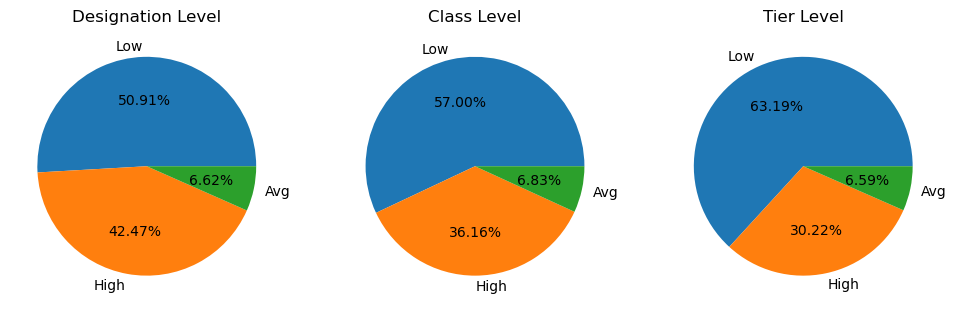

In [176]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
val = cluster_df1_grp['designation'].value_counts()
plt.pie(val, labels=list(val.index), autopct="%0.2f%%")
plt.title("Designation Level")
plt.subplot(1,3,2)
val = cluster_df2_grp['class'].value_counts()
plt.pie(val, labels=list(val.index), autopct="%0.2f%%")
plt.title("Class Level")
plt.subplot(1,3,3)
val = cluster_df3_grp['company_level'].value_counts()
plt.pie(val, labels=list(val.index), autopct="%0.2f%%")
plt.title("Tier Level")
plt.show()

#### Inference:
- With 10% range of mean, across all levels ~6% are average earners
- Employees in below average income increases from designation to company 
- Employees in above average income decreases from designation to company 
- It indicates severe parity in designation and years of experience

# Questionnairre in Manual Clustering

### Top 10 employees (earning more than most of the employees in the company)

In [183]:
cluster_df3_grp[cluster_df3_grp['company_level'] == "High"].sort_values(by='ctc', ascending=False)[['email_encoded', 'ctc']].iloc[:10]

,email_encoded,ctc
15493,64483.0,200000000
9684,52927.0,200000000
74141,73050.0,200000000
20584,129346.0,200000000
20547,12117.0,200000000
20514,105580.0,200000000
20362,95110.0,200000000
20327,30680.0,200000000
3116,90086.0,200000000
12761,4180.0,200000000


### Top 10 employees of data science in each company earning more than their peers - Class 1

In [184]:
cluster_df2_grp[cluster_df2_grp['class'] == "High"].sort_values(by='ctc', ascending=False)[['email_encoded', 'ctc']].iloc[:10]

,email_encoded,ctc
2106,93850.0,200000000
16565,50689.0,200000000
22795,121239.0,200000000
8942,39515.0,200000000
76450,100470.0,200000000
57305,93348.0,200000000
8972,55533.0,200000000
8988,9112.0,200000000
162865,39685.0,200000000
9152,44751.0,200000000


### Bottom 10 employees of data science in each company earning less than their peers - Class 3

In [185]:
cluster_df2_grp[cluster_df2_grp['class'] == "Low"].sort_values(by='ctc', ascending=False)[['email_encoded', 'ctc']].iloc[-10:]

,email_encoded,ctc
35431,110489.0,1000
156478,132383.0,1000
2989,14808.0,1000
80274,35919.0,600
141155,132191.0,600
65508,63600.0,500
136924,1975.0,300
73628,45459.0,25
42906,17197.0,24
110049,89777.0,2


### Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [186]:
cluster_df3_grp[cluster_df3_grp['company_level'] == "Low"].sort_values(by='ctc', ascending=False)[['email_encoded', 'ctc']].iloc[-10:]

,email_encoded,ctc
2629,69496.0,1000
108060,75525.0,1000
134975,90677.0,1000
141155,78787.0,600
80274,35919.0,600
65508,63600.0,500
136924,50782.0,300
73628,15376.0,25
42906,116829.0,24
110049,82544.0,2


### Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X


### Top 10 companies (based on their CTC)

In [187]:
cluster_df3_grp[cluster_df3_grp['company_level'] == "High"].sort_values(by='ctc', ascending=False)[['company_encoded', 'ctc']].iloc[:10]

,company_encoded,ctc
15493,3483.0,200000000
9684,2511.0,200000000
74141,15238.0,200000000
20584,4622.0,200000000
20547,4607.0,200000000
20514,4603.0,200000000
20362,4551.0,200000000
20327,4548.0,200000000
3116,858.0,200000000
12761,3173.0,200000000


### Top 2 positions in every company (based on their CTC)

In [ ]:
# cluster_df2_grp[cluster_df2_grp['class'] == "High"].sort_values(by='ctc', ascending=False)[['company_encoded', 'ctc']].iloc[:10]

# Employee DataFrame

In [189]:
emp_df = df.drop(['company_hash', 'email_hash', 'job_position', 'software_job', 'data_job', "dups"], axis=1)

In [190]:
emp_df.head()

,orgyear,ctc,ctc_updated_year,email_encoded,job_cleaned,job_encoded,company_encoded
0,2016,1100000,2020,57308.0,other,418.0,871.0
1,2018,449999,2019,92119.0,fullstack engineer,265.0,18125.0
2,2015,2000000,2020,37747.0,backend engineer,113.0,14246.0
3,2017,700000,2019,125068.0,backend engineer,113.0,11088.0
4,2017,1400000,2019,58366.0,fullstack engineer,265.0,18591.0


In [191]:
emp_df['job_cleaned'] = emp_df['job_cleaned'].fillna("Unknown")
emp_df['job_encoded'] = emp_df['job_encoded'].fillna(-1)

In [202]:
emp_df.isnull().sum()

orgyear             0
ctc                 0
ctc_updated_year    0
email_encoded       0
job_cleaned         0
job_encoded         0
company_encoded     0
dtype: int64

In [192]:
emp_grp = emp_df.groupby('email_encoded')[['orgyear', 'ctc_updated_year']].min()
emp_grp

,orgyear,ctc_updated_year
email_encoded,,
0.0,2012,2019
1.0,2013,2020
2.0,2021,2019
3.0,2004,2021
4.0,2018,2020
...,...,...
133383.0,2014,2020
133384.0,2004,2019
133385.0,2014,2019


In [200]:
emp_grp['yoe'] = 2025 - emp_df.groupby('email_encoded')['orgyear'].min()
emp_grp['ctc_updated_year_max'] = emp_df.groupby('email_encoded')['ctc_updated_year'].max()
emp_grp['n_company'] = emp_df.groupby('email_encoded')['company_encoded'].nunique()
emp_grp['inital_ctc'] = emp_df.groupby('email_encoded')['ctc'].min()
emp_grp['avg_ctc'] = emp_df.groupby('email_encoded')['ctc'].mean()
df_sorted = emp_df.sort_values(['email_encoded', 'ctc'])
emp_grp['recent_company'] = df_sorted.groupby('email_encoded').tail(1)['company_encoded']
emp_grp['recent_job'] = df_sorted.groupby('email_encoded').tail(1)['job_encoded']
emp_grp['recent_hike'] = 2025 - emp_df.groupby('email_encoded')['ctc_updated_year'].max()
emp_grp['current_ctc'] = emp_df.groupby('email_encoded')['ctc'].max()
# emp_grp['avg_increment_percent'] = np.round((emp_df.groupby('email_encoded')['ctc'].max() - emp_df.groupby('email_encoded')['ctc'].min())*100/emp_df.groupby('email_encoded')['ctc'].min(),2)

In [201]:
df_sorted.groupby('email_encoded').tail(1)['company_encoded']

,orgyear,ctc_updated_year,yoe,ctc_updated_year_max,n_company,inital_ctc,avg_ctc,current_ctc,recent_hike,recent_company,recent_job
email_encoded,,,,,,,,,,,
0.0,2012,2019,13,2019,1,3500000,3500000.0,3500000,6,NaN,NaN
1.0,2013,2020,12,2020,1,250000,250000.0,250000,5,NaN,NaN
2.0,2021,2019,4,2019,1,1300000,1300000.0,1300000,6,14246.0,113.0
3.0,2004,2021,21,2021,1,2000000,2000000.0,2000000,4,11088.0,113.0
4.0,2018,2020,7,2021,1,380000,415000.0,450000,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
133383.0,2014,2020,11,2020,1,640000,640000.0,640000,5,10958.0,224.0
133384.0,2004,2019,21,2019,1,3529999,3529999.0,3529999,6,6526.0,265.0
133385.0,2014,2019,11,2019,1,900000,900000.0,900000,6,NaN,NaN


In [210]:
sorted_tab = df_sorted.groupby('email_encoded').tail(1)[['email_encoded','company_encoded']]

In [ ]:
pd.merge(emp_grp, sorted_tab, on='email_encoded')

In [207]:
emp_df.sort_values(by=['email_encoded', 'ctc'])

,orgyear,ctc,ctc_updated_year,email_encoded,job_cleaned,job_encoded,company_encoded
84638,2012,3500000,2019,0.0,backend engineer,113.0,3483.0
506,2013,250000,2020,1.0,backend engineer,113.0,11357.0
122325,2021,1300000,2019,2.0,fullstack engineer,265.0,7128.0
53844,2004,2000000,2021,3.0,fullstack engineer,265.0,3505.0
947,2018,380000,2020,4.0,database administrator,189.0,12421.0
...,...,...,...,...,...,...,...
22307,2014,640000,2020,133383.0,other,418.0,8192.0
39637,2004,3529999,2019,133384.0,qa engineer,479.0,21709.0
148315,2014,900000,2019,133385.0,devops engineer,203.0,33323.0
14106,2020,700000,2020,133386.0,fullstack engineer,265.0,34059.0


In [194]:
emp_grp.drop(['orgyear','ctc_updated_year','ctc_updated_year_max'

,orgyear,ctc_updated_year,yoe,ctc_updated_year_max,n_company,inital_ctc,avg_ctc,current_ctc,recent_hike
email_encoded,,,,,,,,,
0.0,2012,2019,13,2019,1,3500000,3500000.0,3500000,6
1.0,2013,2020,12,2020,1,250000,250000.0,250000,5
2.0,2021,2019,4,2019,1,1300000,1300000.0,1300000,6
3.0,2004,2021,21,2021,1,2000000,2000000.0,2000000,4
4.0,2018,2020,7,2021,1,380000,415000.0,450000,4
...,...,...,...,...,...,...,...,...,...
133383.0,2014,2020,11,2020,1,640000,640000.0,640000,5
133384.0,2004,2019,21,2019,1,3529999,3529999.0,3529999,6
133385.0,2014,2019,11,2019,1,900000,900000.0,900000,6


# Miscellaneous

In [ ]:
raw_data.groupby('email_hash')['orgyear'].apply(list)

In [ ]:
def test(val):
    list_values = list(val)
#     return list_values
    for value in list_values:
        if math.isnan(value):
            return 1        
    return 0

In [ ]:
test_data = raw_data.groupby('email_hash')['orgyear'].apply(list)

In [ ]:
test_data[temp==1]

In [ ]:
temp[temp==1]

## Knn Imputation for Missing Values

In [188]:
raw_data.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')